In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport sog1_helpers

import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#plt.rcParams['text.usetex'] = True

plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

# Phosphosite variants

Analysis plan:
1. Effect of phosphomutants relative to WT?
- Line plot of WT tiles vs phosphomutant tiles
2. Do the newly confirmed phosphosites (T96, T249 and T273) play a role in activity?
3. Do all confirmed PS contribute equally to activity? 
- Use single confirmed A (A1c1):
    - plot WT trace vs scatter of variants
    - And above, plot a bar graph with fold change of each variant 
4. Are there non-confirmed PS that contribute to activity? 
- Do predicted PS contribute to activity?: Full confirmed (A1c1) vs Full confirmed + predicted (A1b)
- Do other residues contribute to activity?: Full confirmed + predicted (A1b) vs maximal phospho mutant (A1a)
5. Is there an ordering when phosphorylation matters?
- Heatmap or scatter plot ??
6. Does the presence/lack of the aromatic ring in the substituent (Ala versus Phe) alter the outcome? 
- Scatter plot of A1a vs A2a
- Scatter plot of A1b vs A2b


In [3]:
activity_col = "Activity_S3_1"

In [8]:
# WT tiles
BasicArTh = sog1_helpers.return_activities("BasicArTh", pos_regex = r'\.(\d+)')

# 1. Combinatorial phosphomutants

In [9]:
PSv_conf2cA_STYA = sog1_helpers.return_activities("PSv_conf2cA_STYA")
PSv_conf2cA_STYA.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2cA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926
1,8_PSv_conf2cA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427
2,9_PSv_conf2cA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916


In [10]:
PSv_conf2cA_STYA_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2cA_STYA, BasicArTh, activity_col)
PSv_conf2cA_STYA_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars
0,7_PSv_conf2cA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,[96]
1,8_PSv_conf2cA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,[96]
2,9_PSv_conf2cA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,[96]
3,10_PSv_conf2cA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,[96]
4,21_PSv_conf2cA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,[237]
5,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVAPKLATP,433.167326,327.373221,380.270274,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244]"
6,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLAAP,2149.994714,2332.816811,2241.405763,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 249]"
7,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLAAP,1155.997634,1248.266452,1202.132043,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[244, 249]"
8,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVAPKLAAP,4289.037326,4376.962285,4332.999805,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244, 249]"
9,23_PSv_conf2cA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVAPKLATPEPRNAVRICS,NaN,NaN,NaN,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,"[237, 244]"


In [11]:
PSv_conf2cA_STYA_vs_basic["vars"].value_counts()

vars
[96]               4
[244, 249]         4
[237, 244]         3
[237, 249]         3
[237, 244, 249]    3
[350, 356]         3
[423, 430]         3
[356, 372]         2
[372]              2
[423, 436]         2
[430, 436]         2
[423, 430, 436]    2
[237]              1
[350]              1
[350, 372]         1
[350, 356, 372]    1
Name: count, dtype: int64

In [12]:
PSv_conf2cA_STYA_vs_basic["Start"].value_counts()

Start
410    4
401    4
211    4
221    4
231    4
341    4
331    1
391    1
371    1
361    1
351    1
61     1
321    1
71     1
241    1
201    1
91     1
81     1
311    1
Name: count, dtype: int64

In [35]:
# PSv_conf2cA_STYA_vs_basic["vars_str"] = PSv_conf2cA_STYA_vs_basic["vars"].astype(str)
# PSv_conf2cA_STYA_vs_basic["var_count"] = PSv_conf2cA_STYA_vs_basic["vars_str"].str.count(",") + 1
# PSv_conf2cA_STYA_vs_basic[["Start", "vars_str"]].value_counts()

In [14]:
PSv_conf2sA_STYA = sog1_helpers.return_activities("PSv_conf2sA_STYA")
PSv_conf2sA_STYA_vs_basic = sog1_helpers.add_var_positions(PSv_conf2sA_STYA, BasicArTh, activity_col)
PSv_conf2sA_STYA_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,var,activ_diff,activ_fold_change
0,7_PSv_conf2sA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,96,-257.309377,0.784785
1,8_PSv_conf2sA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,96,NaN,NaN
2,9_PSv_conf2sA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,96,1124.791786,2.533372
3,10_PSv_conf2sA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,96,NaN,NaN
4,21_PSv_conf2sA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,237,2288.123554,5.843727
5,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLATP,NaN,NaN,NaN,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,237,NaN,NaN
6,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLATP,463.613666,1663.967954,1063.790810,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,244,-291.162915,0.614240
7,22_PSv_conf2sA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLAAP,923.329508,NaN,923.329508,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,249,168.552927,1.223315
8,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVTPKLATPEPRNAVRICS,NaN,NaN,NaN,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,237,NaN,NaN
9,23_PSv_conf2sA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVTPTADPVAPKLATPEPRNAVRICS,496.086024,514.989166,505.537595,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,244,-69.977594,0.876379


In [15]:
plt.rcParams['text.usetex'] = False

In [16]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(4, 9), dpi = 300)
# sog1_helpers.plot_combination_activities(211, ax1, PSv_conf2cA_STYA_vs_basic)
# sog1_helpers.plot_combination_activities(221, ax2, PSv_conf2cA_STYA_vs_basic)
# sog1_helpers.plot_combination_activities(231, ax3, PSv_conf2cA_STYA_vs_basic)

In [17]:
PSv_conf2cA_STYA_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,vars_str,var_count
0,7_PSv_conf2cA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,[96],[96],1
1,8_PSv_conf2cA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,[96],[96],1
2,9_PSv_conf2cA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,[96],[96],1
3,10_PSv_conf2cA_STYA,NaN,91,111,131,DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,558.417688,558.417688,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,[96],[96],1
4,21_PSv_conf2cA_STYA,NaN,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA,2760.512552,2926.642543,2843.577547,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,[237],[237],1
5,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVAPKLATP,433.167326,327.373221,380.270274,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244]","[237, 244]",2
6,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVTPKLAAP,2149.994714,2332.816811,2241.405763,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 249]","[237, 249]",2
7,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVAPKLAAP,1155.997634,1248.266452,1202.132043,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[244, 249]","[244, 249]",2
8,22_PSv_conf2cA_STYA,NaN,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVAPKLAAP,4289.037326,4376.962285,4332.999805,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244, 249]","[237, 244, 249]",3
9,23_PSv_conf2cA_STYA,NaN,221,241,261,GDKAEQEVSEDIFAAVAPTADPVAPKLATPEPRNAVRICS,NaN,NaN,NaN,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,"[237, 244]","[237, 244]",2


In [18]:
PSv_conf2cA_STYA_vs_basic[PSv_conf2cA_STYA_vs_basic["Start"] == 341]

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,vars_str,var_count
21,35_PSv_conf2cA_STYA,NaN,341,361,381,EDPTWFDSGAQFILNAQQLVEALSLCDDLLGSQDREENTN,711.164834,NaN,711.164834,BasicArTh.35,Q6NQK2,EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,1355.833002,1199.104404,1277.468703,"[350, 356]","[350, 356]",2
22,35_PSv_conf2cA_STYA,NaN,341,361,381,EDPTWFDSGAQFILNSQQLVEALSLCDDLLGAQDREENTN,1503.440528,2734.623803,2119.032165,BasicArTh.35,Q6NQK2,EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,1355.833002,1199.104404,1277.468703,"[350, 372]","[350, 372]",2
23,35_PSv_conf2cA_STYA,NaN,341,361,381,EDPTWFDSGSQFILNAQQLVEALSLCDDLLGAQDREENTN,733.517669,NaN,733.517669,BasicArTh.35,Q6NQK2,EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,1355.833002,1199.104404,1277.468703,"[356, 372]","[356, 372]",2
24,35_PSv_conf2cA_STYA,NaN,341,361,381,EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN,594.936252,875.719003,735.327628,BasicArTh.35,Q6NQK2,EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,1355.833002,1199.104404,1277.468703,"[350, 356, 372]","[350, 356, 372]",3


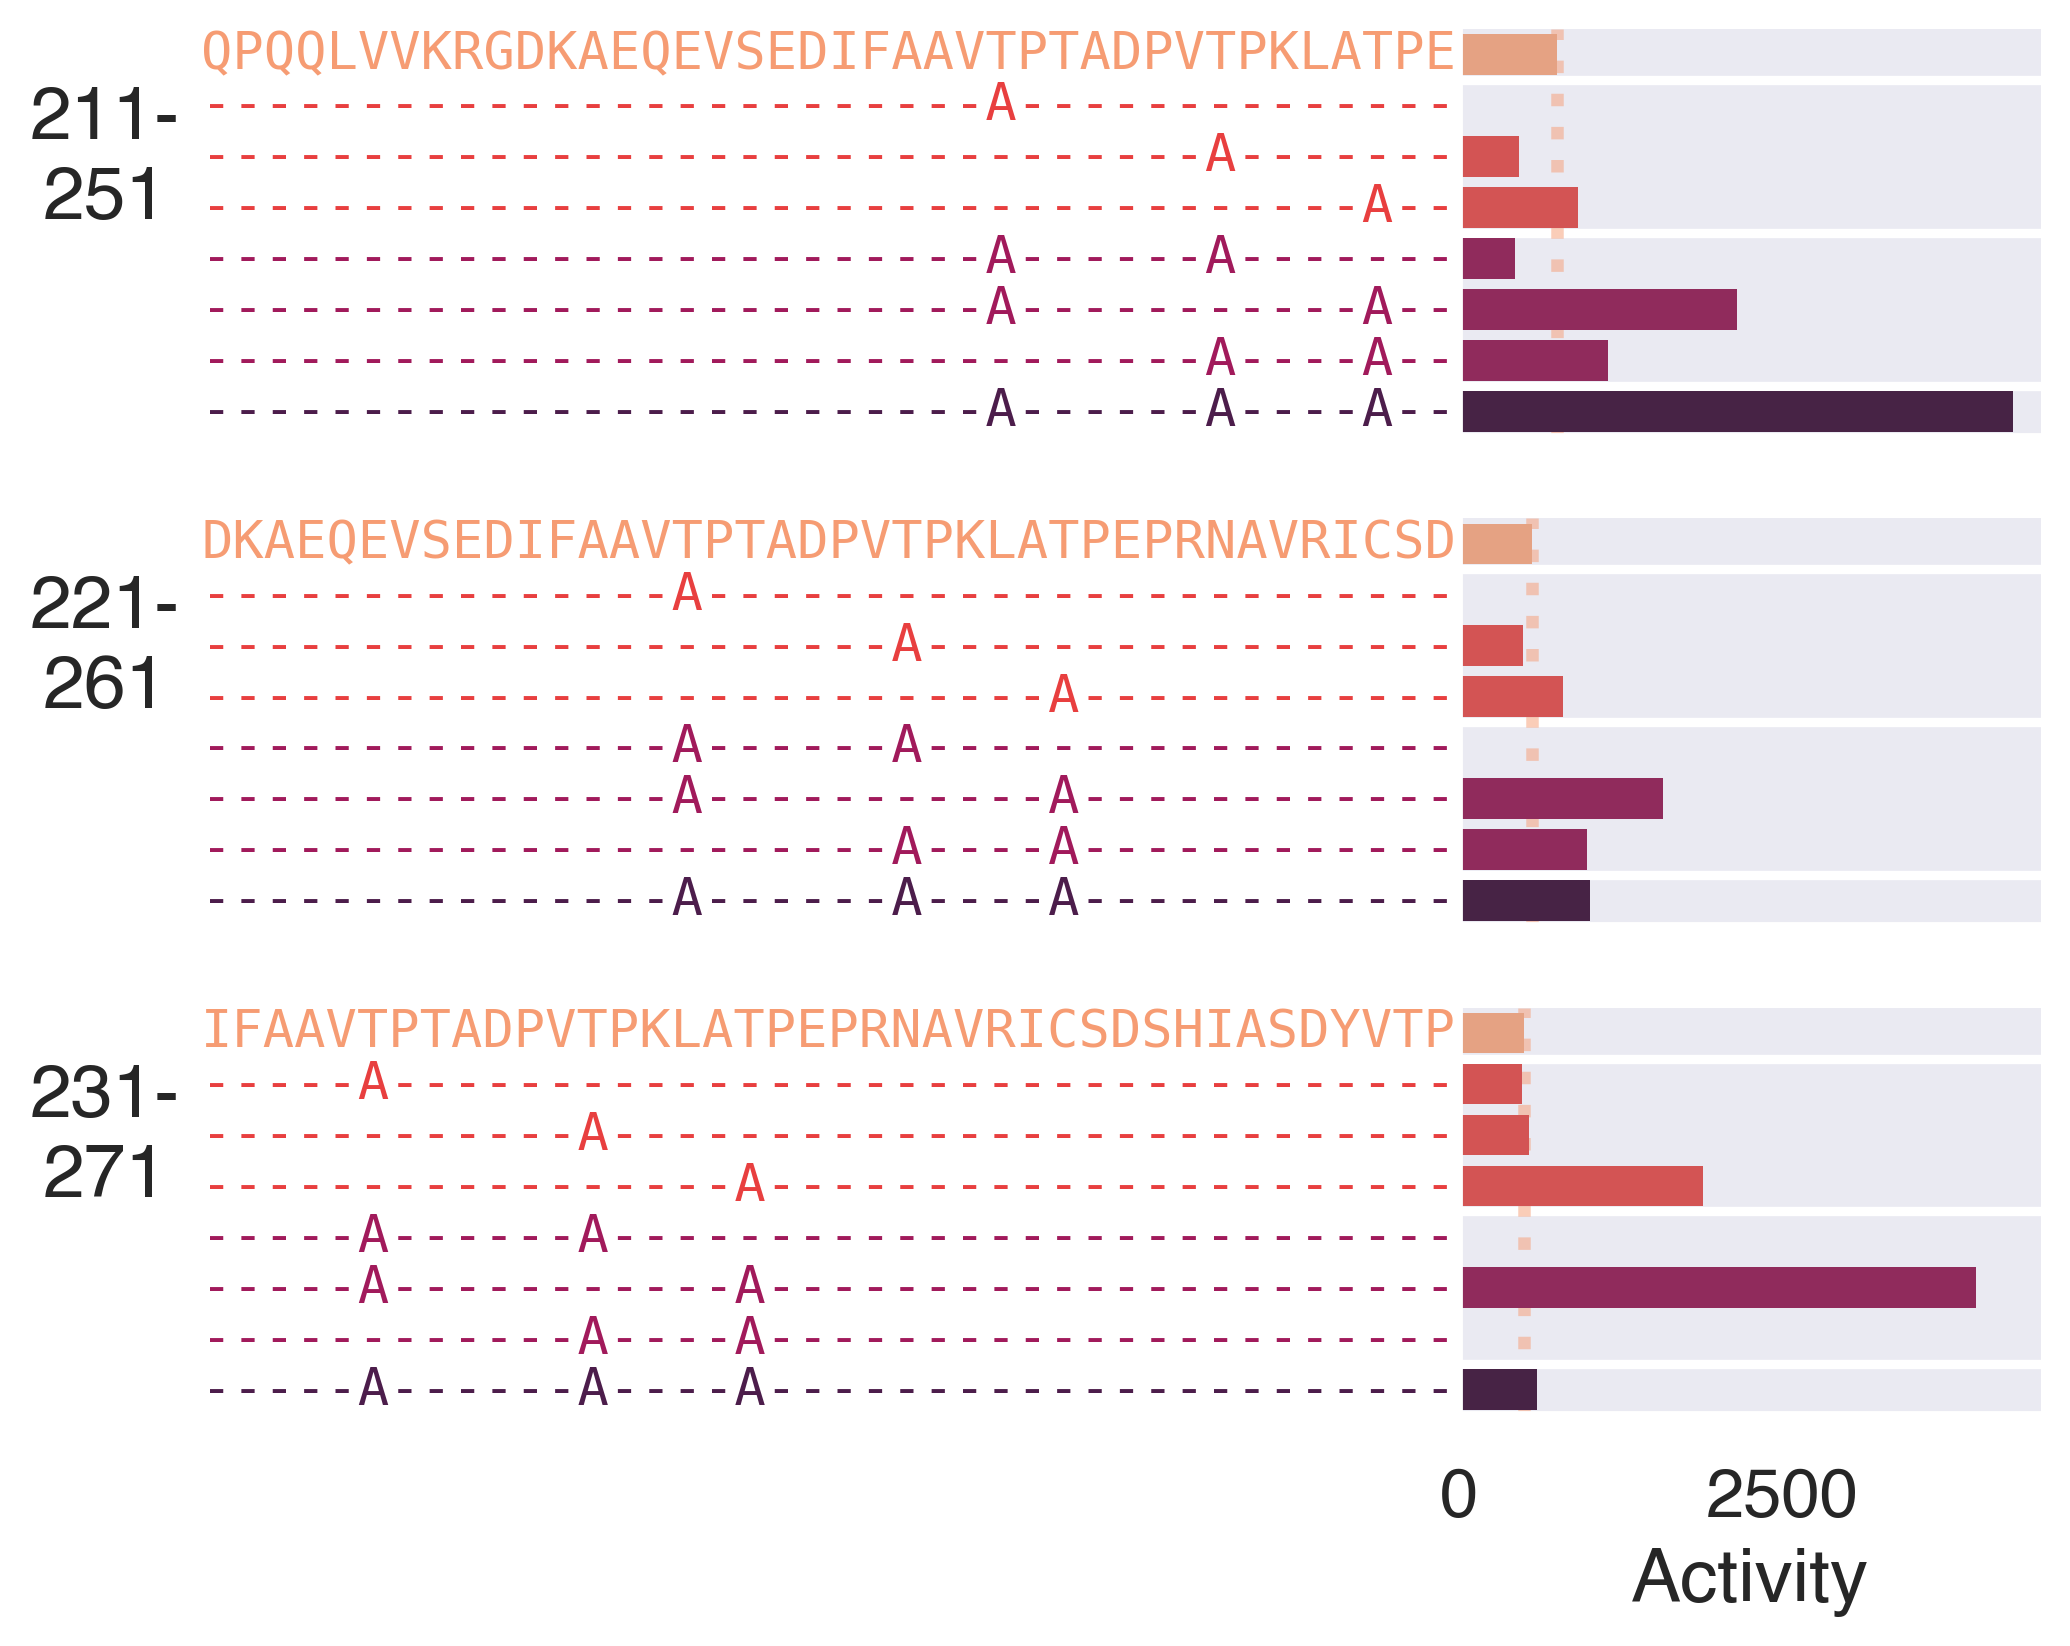

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(2.5, 6), dpi = 300)
sog1_helpers.plot_combination_activities(211, ax1, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)
sog1_helpers.plot_combination_activities(221, ax2, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)
sog1_helpers.plot_combination_activities(231, ax3, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)

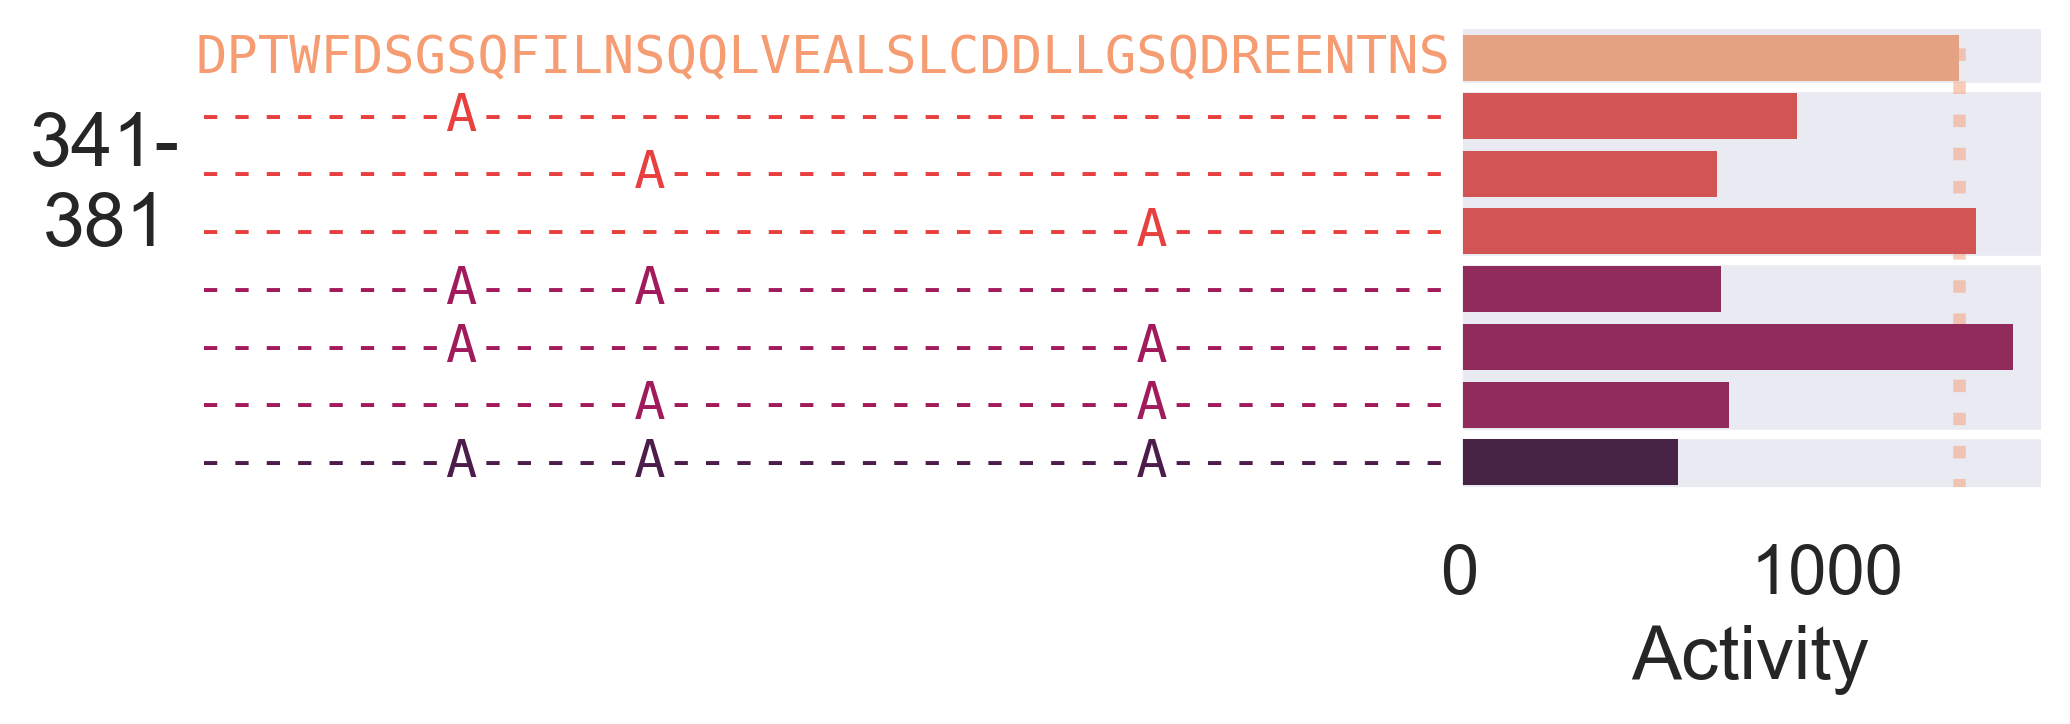

In [37]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(2.5, 2), dpi = 300)
sog1_helpers.plot_combination_activities(341, ax1, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)

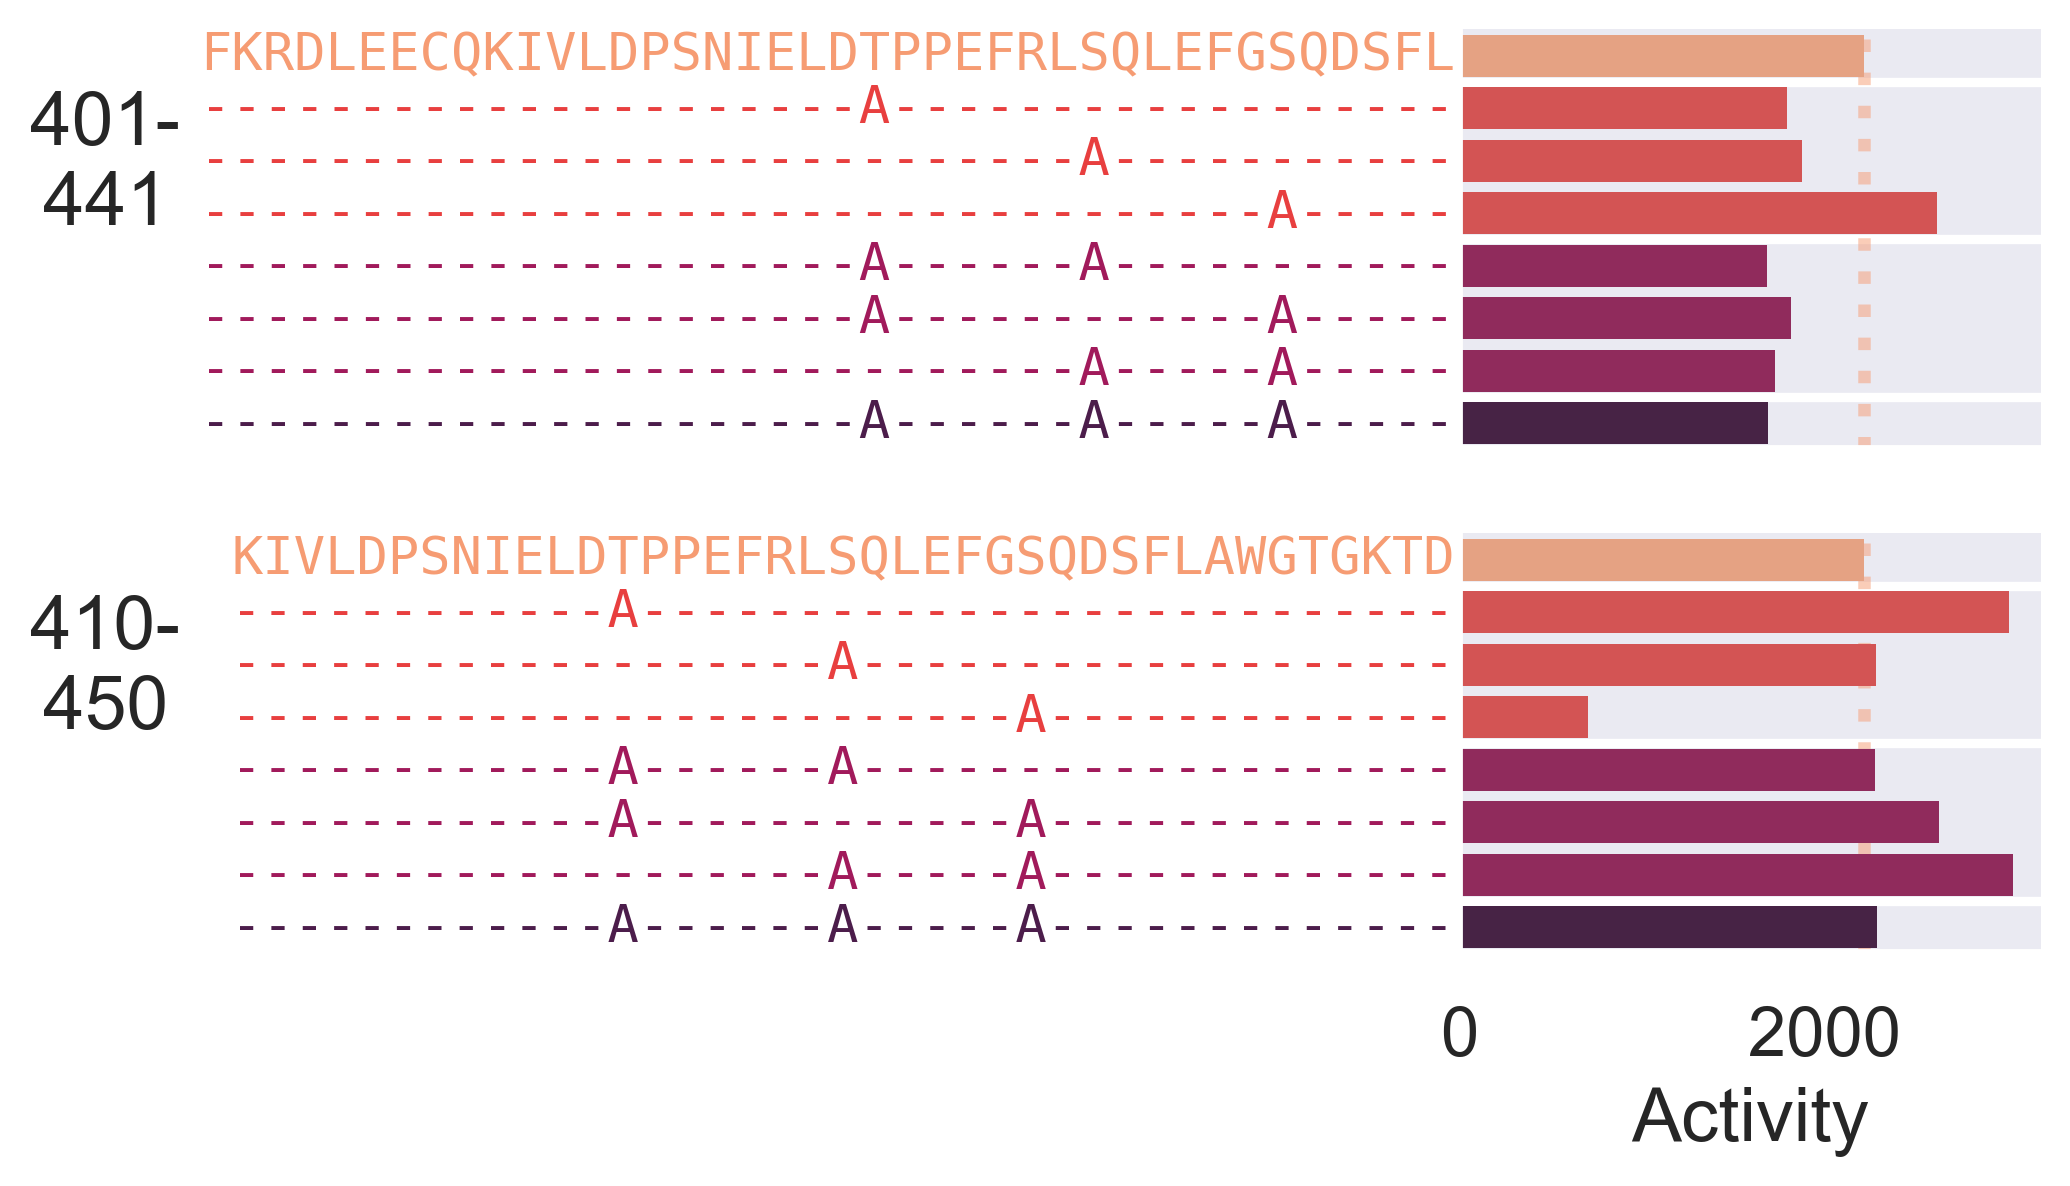

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(2.5, 4), dpi = 300)
sog1_helpers.plot_combination_activities(401, ax1, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)
sog1_helpers.plot_combination_activities(410, ax2, PSv_conf2cA_STYA_vs_basic, PSv_conf2sA_STYA_vs_basic)

# 2. Combinatorial phosphomimetic

In [39]:
PSv_conf2cD= sog1_helpers.return_activities("PSv_conf2cD")
PSv_conf2cD = PSv_conf2cD[~PSv_conf2cD["Description"].str.contains("DD")]
PSv_conf2cD.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2cD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750
1,8_PSv_conf2cD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN
2,9_PSv_conf2cD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569


In [40]:
PSv_conf2sD= sog1_helpers.return_activities("PSv_conf2sD")
PSv_conf2sD = PSv_conf2sD[~PSv_conf2sD["Description"].str.contains("DD")]
PSv_conf2sD.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2sD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750
1,8_PSv_conf2sD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN
2,9_PSv_conf2sD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569


In [41]:
PSv_conf2cD_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2cD, BasicArTh, activity_col)
PSv_conf2cD_vs_basic

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars
0,7_PSv_conf2cD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,[96]
1,8_PSv_conf2cD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,[96]
2,9_PSv_conf2cD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,[96]
3,10_PSv_conf2cD,/,91,111,131,DEFIPDVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,NaN,NaN,NaN,BasicArTh.10,Q6NQK2,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,495.092751,785.676325,640.384538,[96]
4,21_PSv_conf2cD,/,201,221,241,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVDPTA,1144.654164,680.506059,912.580111,BasicArTh.21,Q6NQK2,GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA,472.388999,419.267250,445.828124,[237]
5,22_PSv_conf2cD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVDPTADPVDPKLATP,346.460049,348.772056,347.616053,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244]"
6,22_PSv_conf2cD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVDPTADPVTPKLADP,2741.971404,2114.187925,2428.079665,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 249]"
7,22_PSv_conf2cD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVDPKLADP,NaN,NaN,NaN,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[244, 249]"
8,22_PSv_conf2cD,/,211,231,251,QQPQQLVVKRGDKAEQEVSEDIFAAVDPTADPVDPKLADP,1070.106094,1235.294786,1152.700440,BasicArTh.22,Q6NQK2,QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP,754.776581,850.860928,802.818754,"[237, 244, 249]"
9,23_PSv_conf2cD,/,221,241,261,GDKAEQEVSEDIFAAVDPTADPVDPKLATPEPRNAVRICS,516.680076,253.323297,385.001686,BasicArTh.23,Q6NQK2,GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS,566.063618,959.486272,762.774945,"[237, 244]"


In [45]:
PSv_conf2sD_vs_basic = sog1_helpers.add_var_positions(PSv_conf2sD, BasicArTh, activity_col)
PSv_conf2sD_vs_basic.head(3)

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,var,activ_diff,activ_fold_change
0,7_PSv_conf2sD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750,BasicArTh.7,Q6NQK2,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1195.592810,1693.562924,1444.577867,96,-352.907639,0.704826
1,8_PSv_conf2sD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN,BasicArTh.8,Q6NQK2,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,553.464718,495.706275,524.585497,96,NaN,NaN
2,9_PSv_conf2sD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569,BasicArTh.9,Q6NQK2,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,733.541576,756.101744,744.821660,96,2733.821799,4.726881


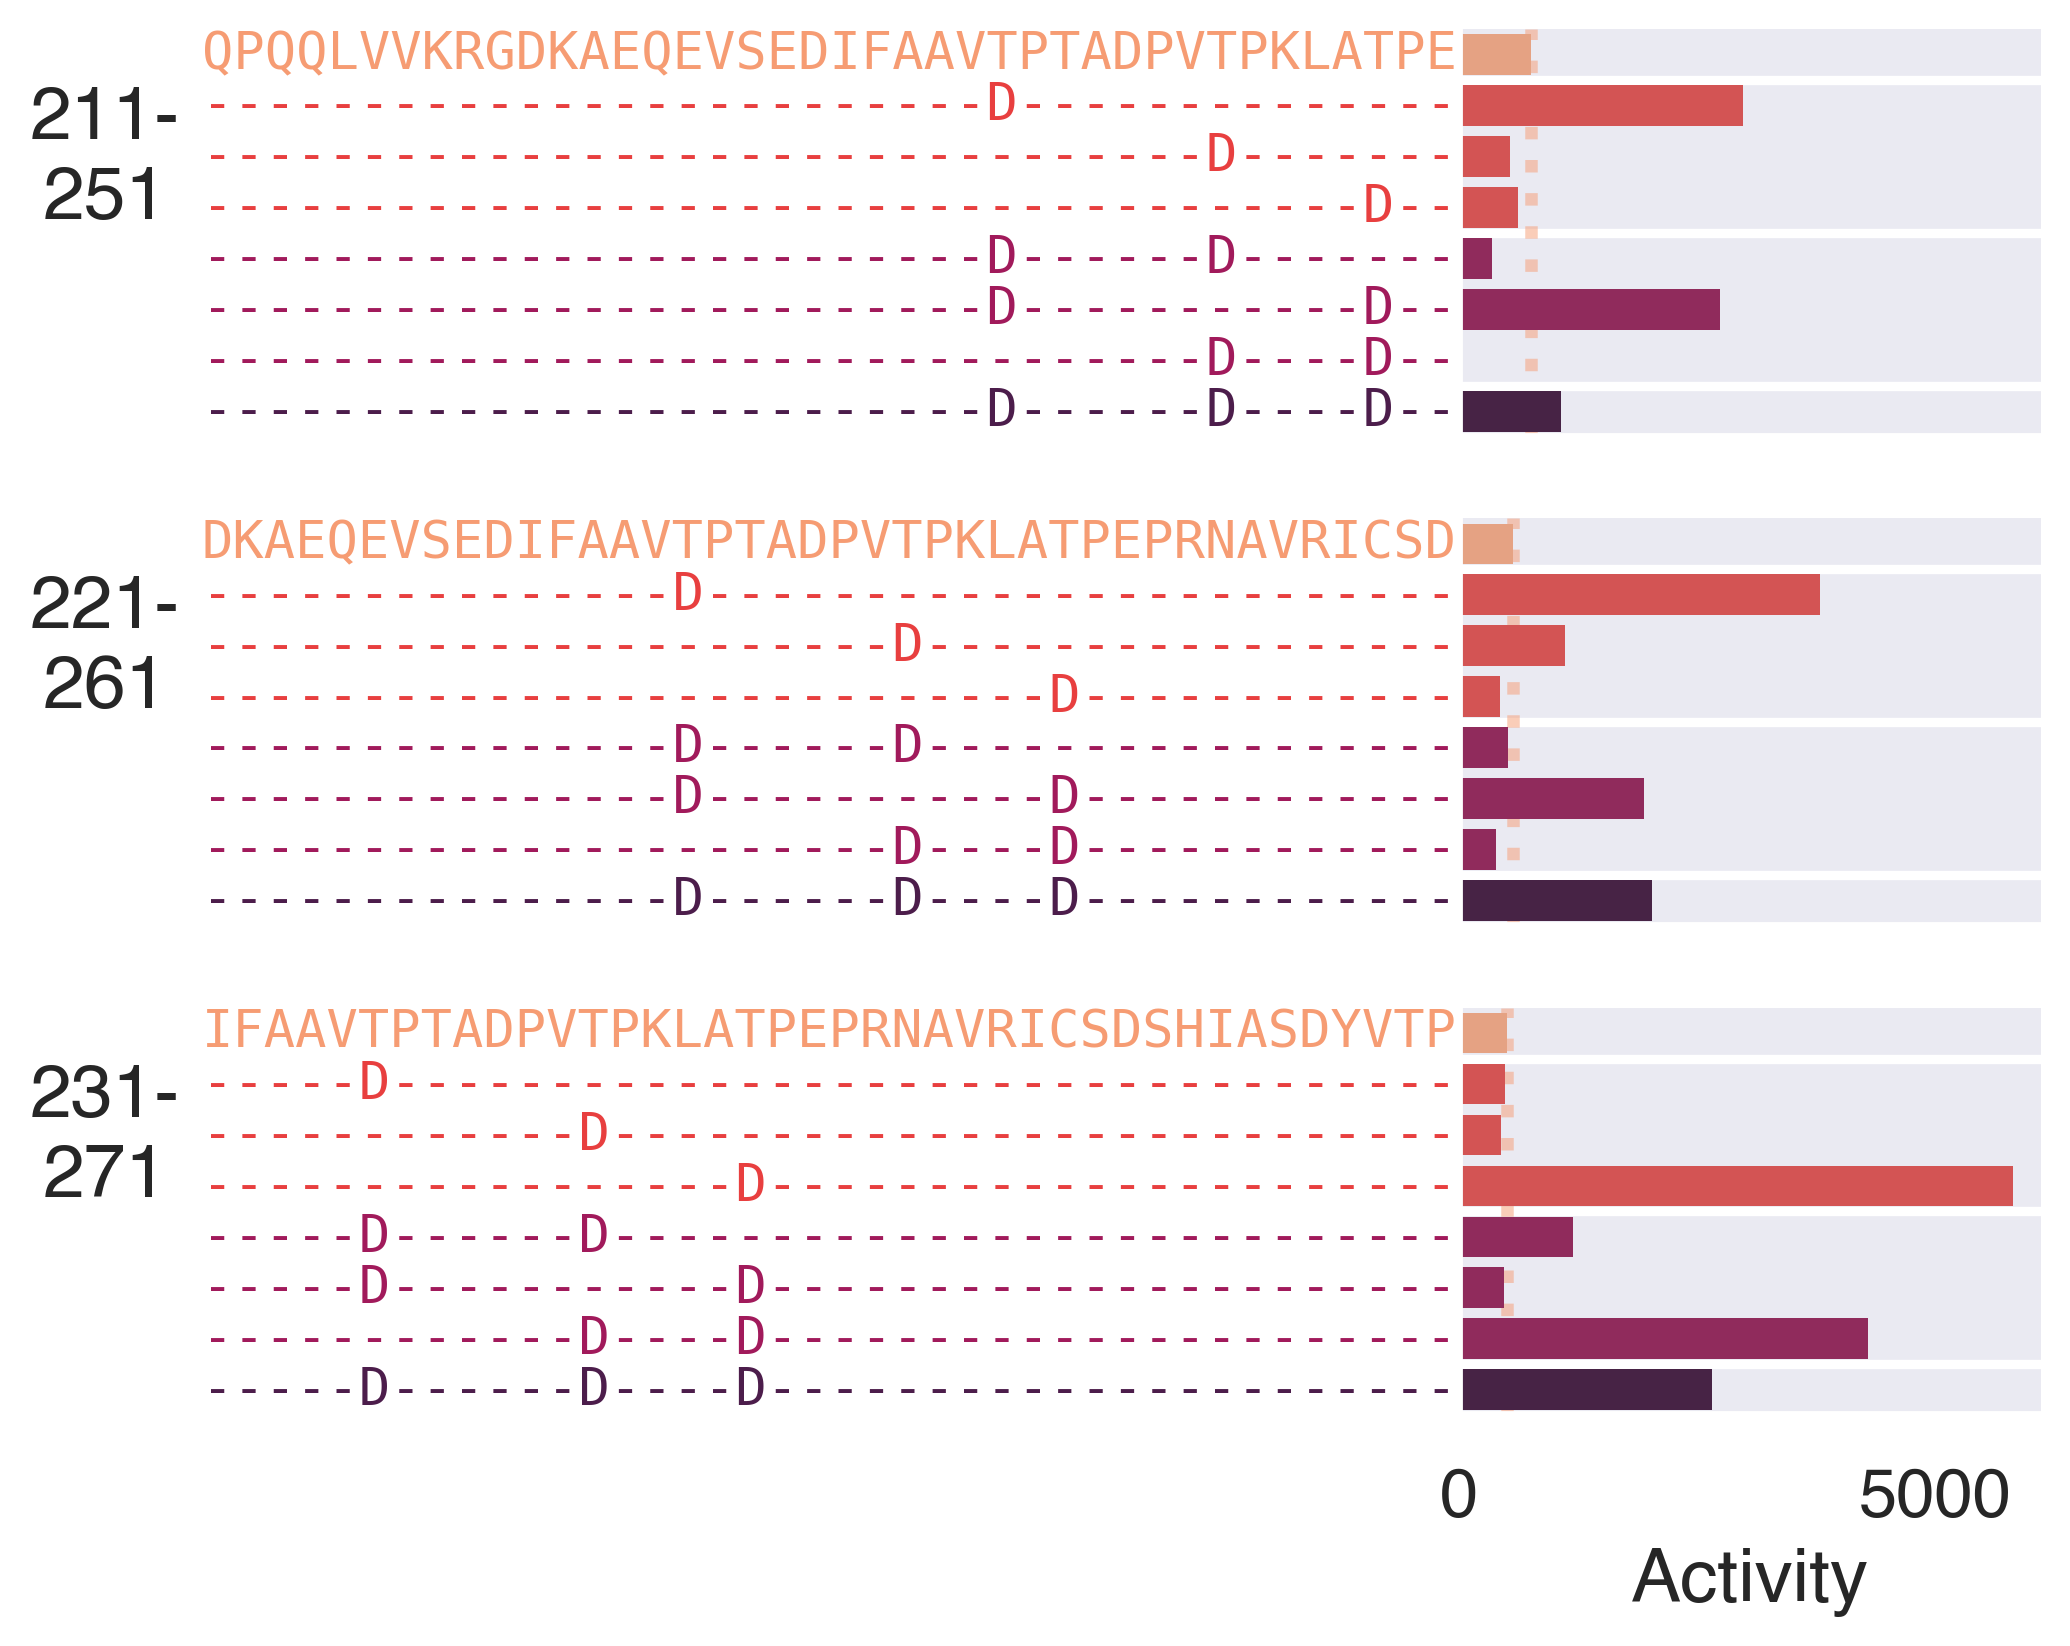

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(2.5, 6), dpi = 300)
sog1_helpers.plot_combination_activities(211, ax1, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")
sog1_helpers.plot_combination_activities(221, ax2, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")
sog1_helpers.plot_combination_activities(231, ax3, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")

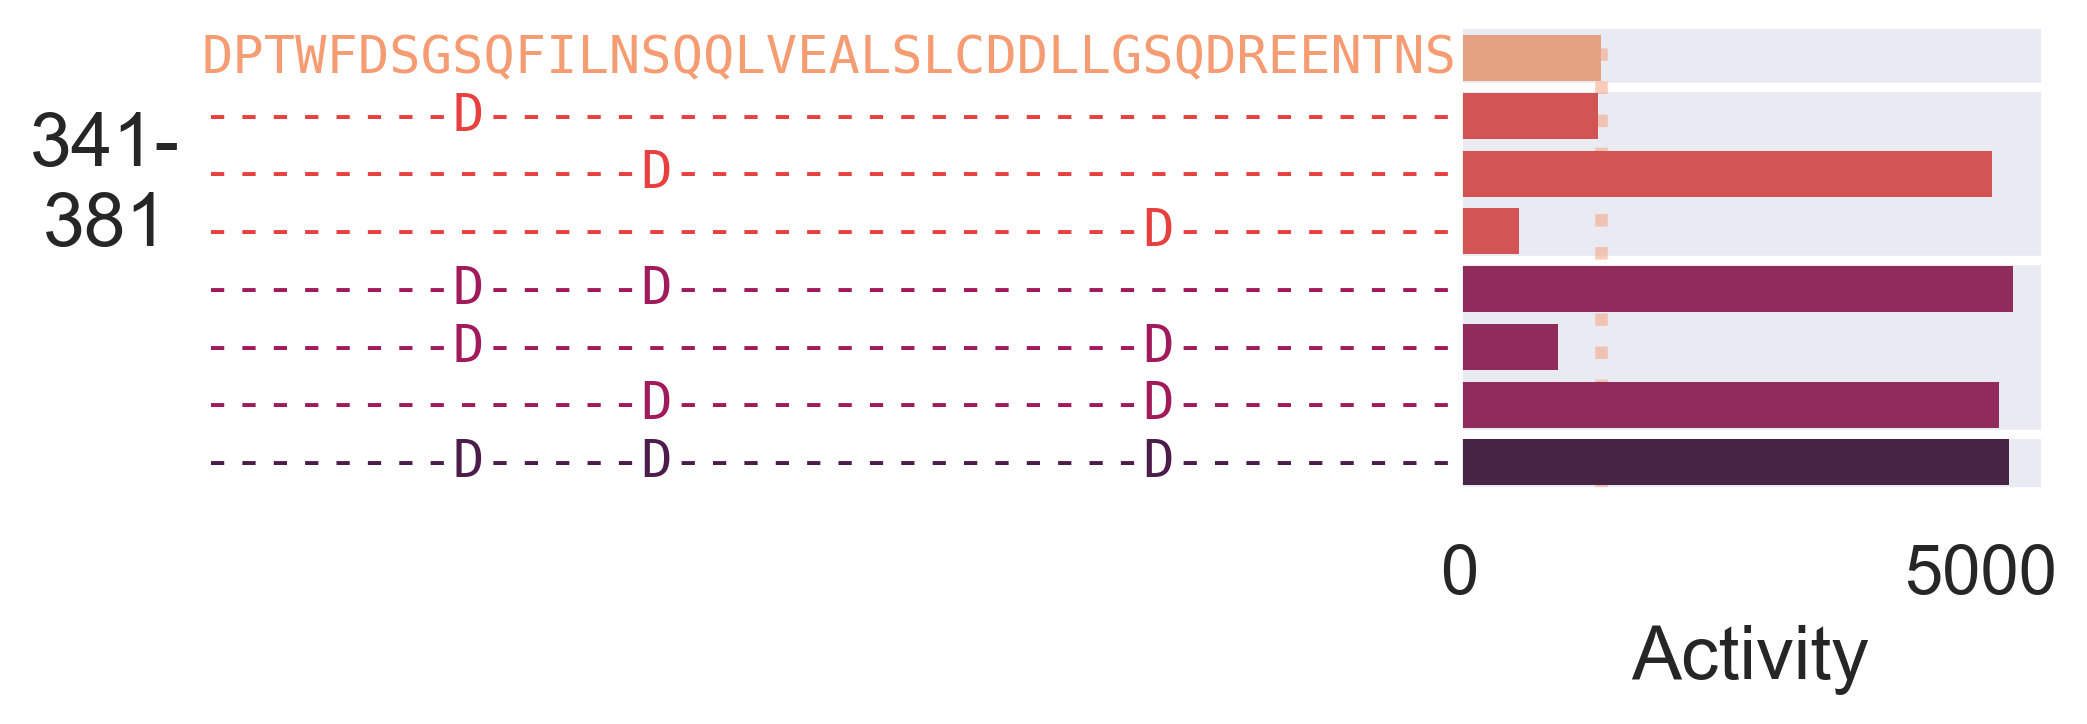

In [51]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(2.5, 2), dpi = 300)
sog1_helpers.plot_combination_activities(341, ax1, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")

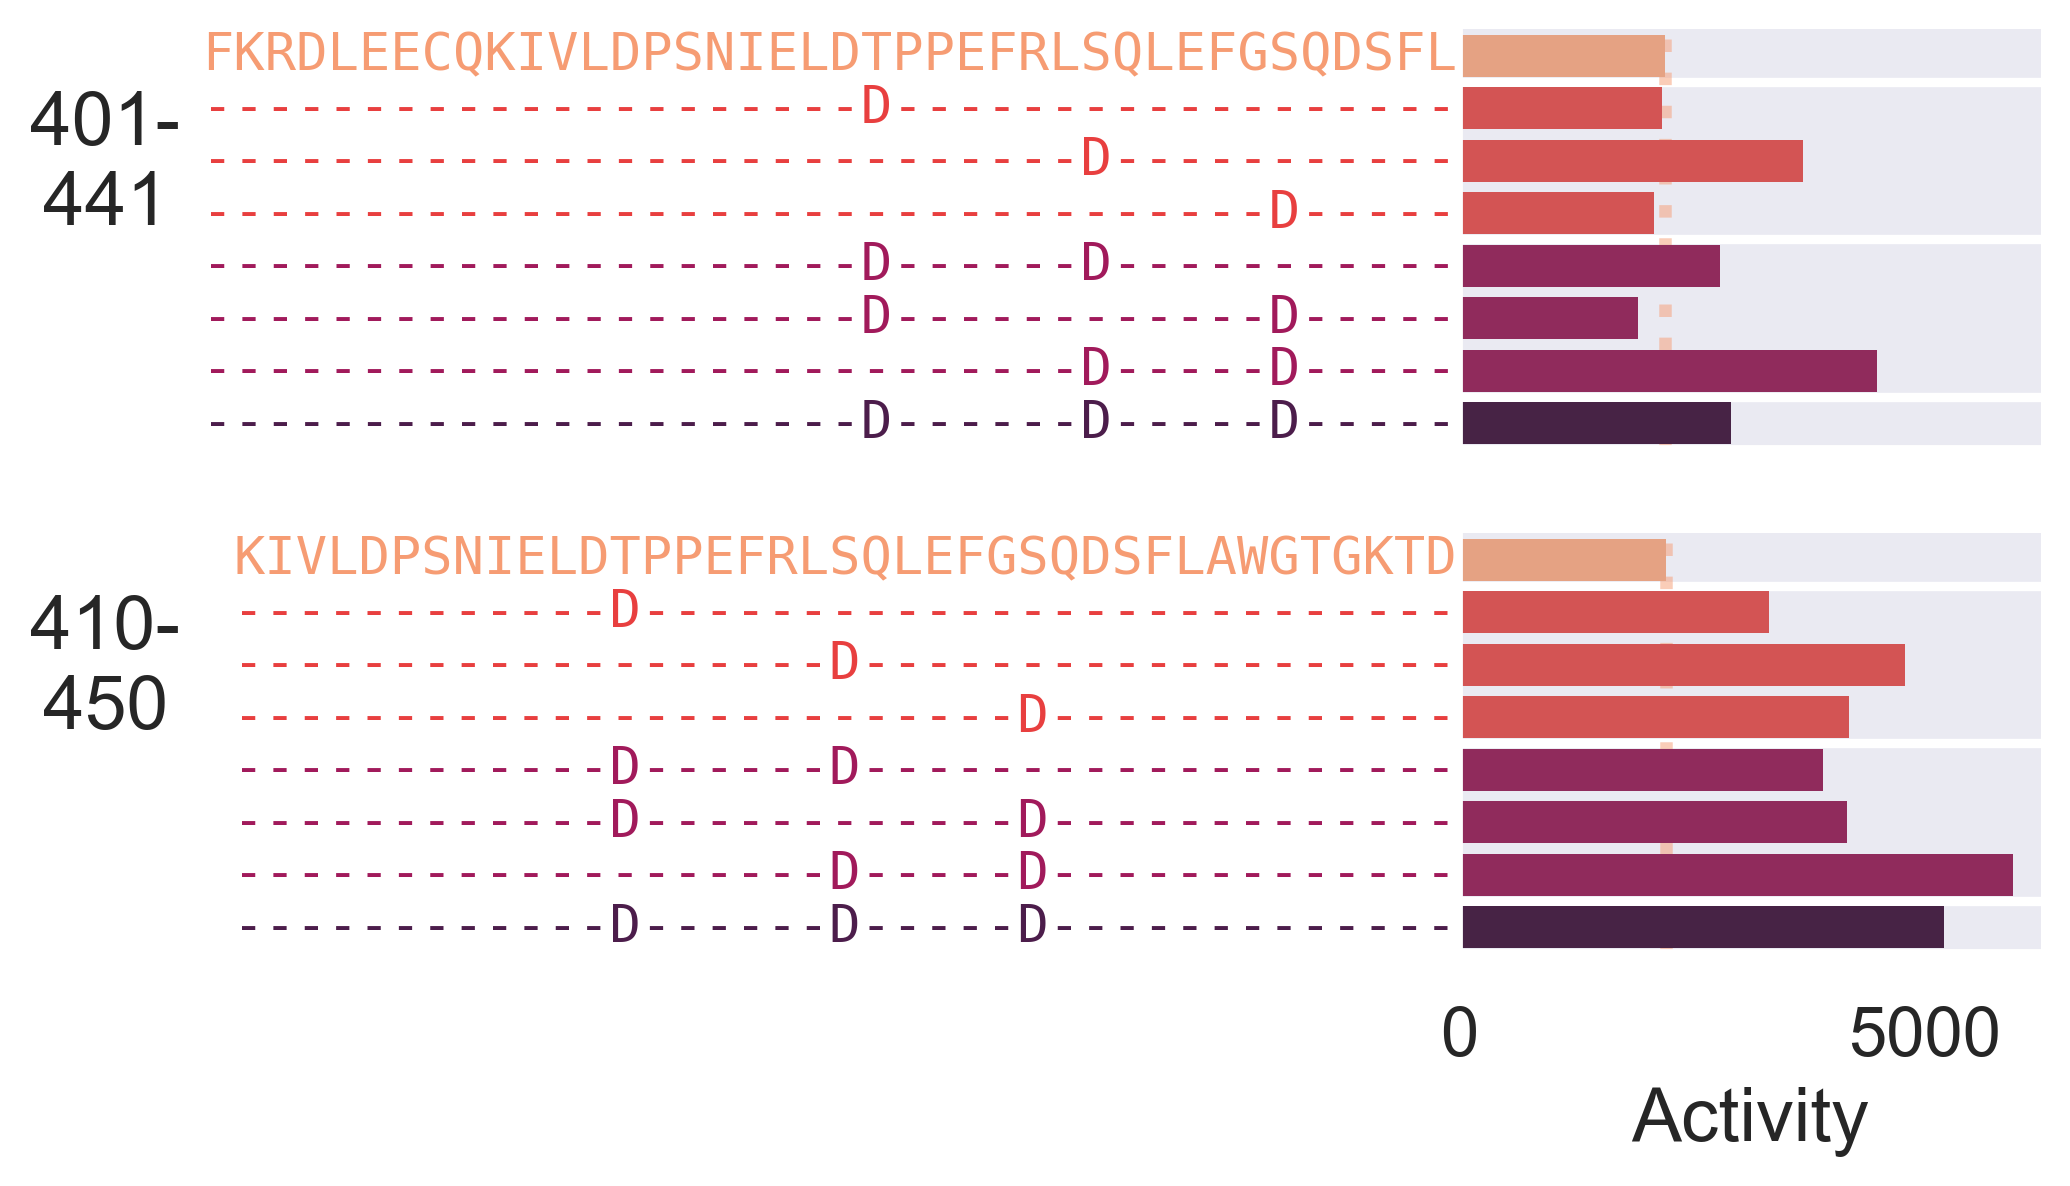

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(2.5, 4), dpi = 300)
sog1_helpers.plot_combination_activities(401, ax1, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")
sog1_helpers.plot_combination_activities(410, ax2, PSv_conf2cD_vs_basic, PSv_conf2sD_vs_basic, var_str = "D")